1. Повнозв'язані нейронні мережі

Завантаження даних

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('dataset.csv')

Виведення інформації про датасет

In [3]:
print(df.head())

print(df.info())

print(df.isnull().sum())

   ID  Age  Gender Heart_Attack  Blood_Pressure  Cholesterol Diabetes Smoking  \
0   1   50  Female           No      147.978602   215.563010       No      No   
1   2   40  Female           No      119.558478   210.308676       No     Yes   
2   3   26  Female           No      102.617993   241.415264       No      No   
3   4   54    Male           No      121.465827   252.900145       No      No   
4   5   19  Female           No      130.216946   164.222684       No     Yes   

  Alcohol_Consumption Exercise_Level  ...  Medication Hypertension Heart_Rate  \
0            Moderate            Low  ...          No           No  59.022408   
1                 NaN            Low  ...          No           No  76.564803   
2               Heavy            Low  ...          No           No  88.519388   
3            Moderate           High  ...          No          Yes  68.676712   
4               Heavy            Low  ...          No           No  62.504824   

   Physical_Activity_Hours

Заповнюємо пропущені значення у Alcohol_Consumption категорією 'Unknown'

In [5]:
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna('Unknown')

print(df['Alcohol_Consumption'].isnull().sum())

0


Виконуємо токенізацію

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Gender', 'Heart_Attack', 'Diabetes', 'Smoking', 'Alcohol_Consumption',
                       'Exercise_Level', 'Family_History', 'Diet_Type', 'Residence', 
                       'Education_Level', 'Employment_Status', 'Marital_Status', 
                       'Medication', 'Hypertension', 'Cultural_Background', 'Age_Group']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df[categorical_columns].head())

   Gender  Heart_Attack  Diabetes  Smoking  Alcohol_Consumption  \
0       0             0         0        0                    1   
1       0             0         0        1                    2   
2       0             0         0        0                    0   
3       1             0         0        0                    1   
4       0             0         0        1                    0   

   Exercise_Level  Family_History  Diet_Type  Residence  Education_Level  \
0               1               0          1          0                1   
1               1               0          2          1                2   
2               1               0          0          1                2   
3               0               0          0          1                1   
4               1               0          2          1                0   

   Employment_Status  Marital_Status  Medication  Hypertension  \
0                  0               2           0             0   
1       

Розділення на тренувальну та тестову вибірки (80% тренувальна, 20% тестова)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Heart_Attack', 'ID'])
y = df['Heart_Attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train data shape:", X_train_scaled.shape)
print("Test data shape:", X_test_scaled.shape)

Train data shape: (216000, 28)
Test data shape: (54000, 28)


Створення моделі
Компіляція моделі
Навчання моделі
Оцінка моделі на тестових даних

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/20
2700/2700 [==============================] - 5s 2ms/step - loss: 0.3778 - accuracy: 0.8805 - val_loss: 0.3612 - val_accuracy: 0.8839
Epoch 2/20
2700/2700 [==============================] - 5s 2ms/step - loss: 0.3690 - accuracy: 0.8813 - val_loss: 0.3602 - val_accuracy: 0.8839
Epoch 3/20
2700/2700 [==============================] - 5s 2ms/step - loss: 0.3665 - accuracy: 0.8813 - val_loss: 0.3605 - val_accuracy: 0.8839
Epoch 4/20
2700/2700 [==============================] - 5s 2ms/step - loss: 0.3656 - accuracy: 0.8813 - val_loss: 0.3599 - val_accuracy: 0.8839
Epoch 5/20
2700/2700 [==============================] - 5s 2ms/step - loss: 0.3650 - accuracy: 0.8813 - val_loss: 0.3601 - val_accuracy: 0.8839
Epoch 6/20
2700/2700 [==============================] - 4s 2ms/step - loss: 0.3645 - accuracy: 0.8813 - val_loss: 0.3595 - val_accuracy: 0.8839
Epoch 7/20
2700/2700 [==============================] - 5s 2ms/step - loss: 0.3643 - accuracy: 0.8813 - val_loss: 0.3596 - val_accuracy:

2. Згорткові нейронні мережі

In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        r"C:\pyprojects\Laba1\kaggle\input\cars-image-dataset\Cars Dataset\train",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

Found 3352 images belonging to 7 classes.
[[[0.08372004 0.09156317 0.07195533]
  [0.08453485 0.09237799 0.07277015]
  [0.08534967 0.09319282 0.07358497]
  ...
  [0.1329752  0.13761304 0.11907066]
  [0.1354826  0.13156103 0.12017329]
  [0.13333334 0.12941177 0.11196262]]

 [[0.10852109 0.11636423 0.09675638]
  [0.10471861 0.11256175 0.0929539 ]
  [0.10091612 0.10875926 0.08915142]
  ...
  [0.13351843 0.13706984 0.11988547]
  [0.13521099 0.13128942 0.11935847]
  [0.13333334 0.12941177 0.11169101]]

 [[0.13333334 0.14117648 0.12156864]
  [0.13333334 0.14117648 0.12156864]
  [0.13333334 0.14117648 0.12156864]
  ...
  [0.13406163 0.13652661 0.1207003 ]
  [0.13493939 0.13101782 0.11854365]
  [0.13333334 0.12941177 0.1114194 ]]

 ...

 [[0.38638562 0.3510915  0.3157974 ]
  [0.3886096  0.35331544 0.31802133]
  [0.4021849  0.3668908  0.33159667]
  ...
  [0.40971988 0.35873947 0.29599437]
  [0.41270754 0.36172715 0.29898205]
  [0.41569522 0.36471483 0.3019697 ]]

 [[0.38475597 0.34946185 0.31416

Виведення класифікацій в датасеті

In [11]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [12]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        r"C:\pyprojects\Laba1\kaggle\input\cars-image-dataset\Cars Dataset\test",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

Found 813 images belonging to 7 classes.
[[[0.8235295  0.8862746  0.93725497]
  [0.8235295  0.8862746  0.93725497]
  [0.839785   0.88952565 0.93725497]
  ...
  [0.7713238  0.8575983  0.90857875]
  [0.7716118  0.8578863  0.9088667 ]
  [0.77189976 0.85817426 0.90915465]]

 [[0.8235295  0.8862746  0.93725497]
  [0.8235295  0.8862746  0.93725497]
  [0.83834517 0.8892377  0.93725497]
  ...
  [0.7832921  0.8615093  0.9151755 ]
  [0.784444   0.86179733 0.91575146]
  [0.7855959  0.8620852  0.91632736]]

 [[0.8235295  0.8862746  0.93725497]
  [0.8235295  0.8862746  0.93725497]
  [0.83690524 0.8889497  0.93725497]
  ...
  [0.79626083 0.86809546 0.9176471 ]
  [0.79712474 0.8686714  0.9176471 ]
  [0.79798865 0.8692474  0.9176471 ]]

 ...

 [[0.8108286  0.6820873  0.5096395 ]
  [0.817164   0.6887107  0.5179907 ]
  [0.82349944 0.695334   0.5263419 ]
  ...
  [0.5736131  0.47557387 0.35792682]
  [0.5867854  0.48751035 0.37604237]
  [0.59828305 0.49632227 0.39828306]]

 [[0.87443453 0.75026405 0.597982

Налаштування CNN моделі

In [14]:
sz = 128

model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_3 (Dense)             (None, 96)               

Навчання моделі

In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50
105/105 [==============================] - 22s 200ms/step - loss: 1.8712 - accuracy: 0.2530 - val_loss: 1.7669 - val_accuracy: 0.3542
Epoch 2/50
105/105 [==============================] - 21s 202ms/step - loss: 1.6997 - accuracy: 0.3610 - val_loss: 1.5630 - val_accuracy: 0.4182
Epoch 3/50
105/105 [==============================] - 22s 205ms/step - loss: 1.5366 - accuracy: 0.4371 - val_loss: 1.4497 - val_accuracy: 0.4895
Epoch 4/50
105/105 [==============================] - 21s 200ms/step - loss: 1.4187 - accuracy: 0.4851 - val_loss: 1.3273 - val_accuracy: 0.5289
Epoch 5/50
105/105 [==============================] - 21s 198ms/step - loss: 1.2848 - accuracy: 0.5346 - val_loss: 1.1990 - val_accuracy: 0.5818
Epoch 6/50
105/105 [==============================] - 20s 191ms/step - loss: 1.1686 - accuracy: 0.5704 - val_loss: 1.1087 - val_accuracy: 0.6273
Epoch 7/50
105/105 [==============================] - 21s 199ms/step - loss: 1.1016 - accuracy: 0.6095 - val_loss: 1.1003 - val_ac

In [16]:
scores = model.evaluate(test_generator)
scores
history.history.keys()
type(history.history['loss'])
len(history.history['loss'])

26/26 [==============================] - 3s 102ms/step - loss: 1.1580 - accuracy: 0.7454


50

Відобразити втрати за перші 5 епох

In [17]:
history.history['loss'][:5]

[1.871211051940918,
 1.699730634689331,
 1.5366013050079346,
 1.4187378883361816,
 1.2848149538040161]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

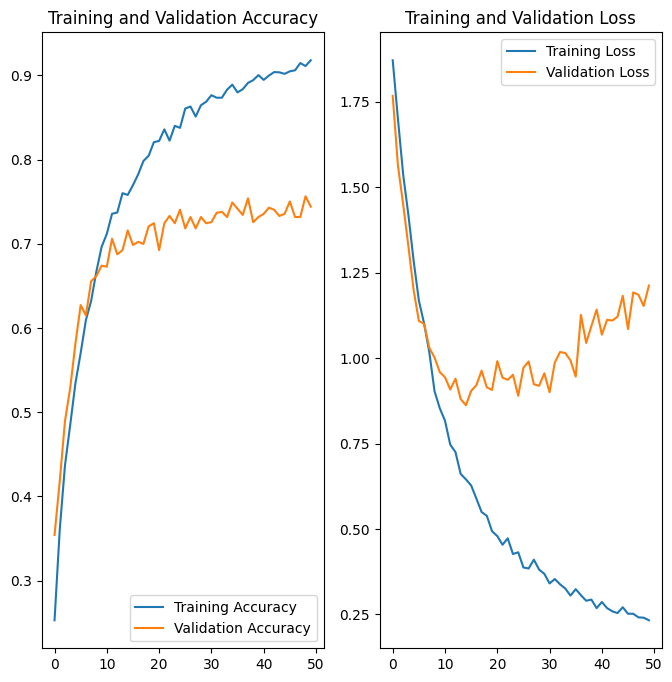

In [19]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Тестування моделі на тестових датасетах

In [20]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 29ms/step


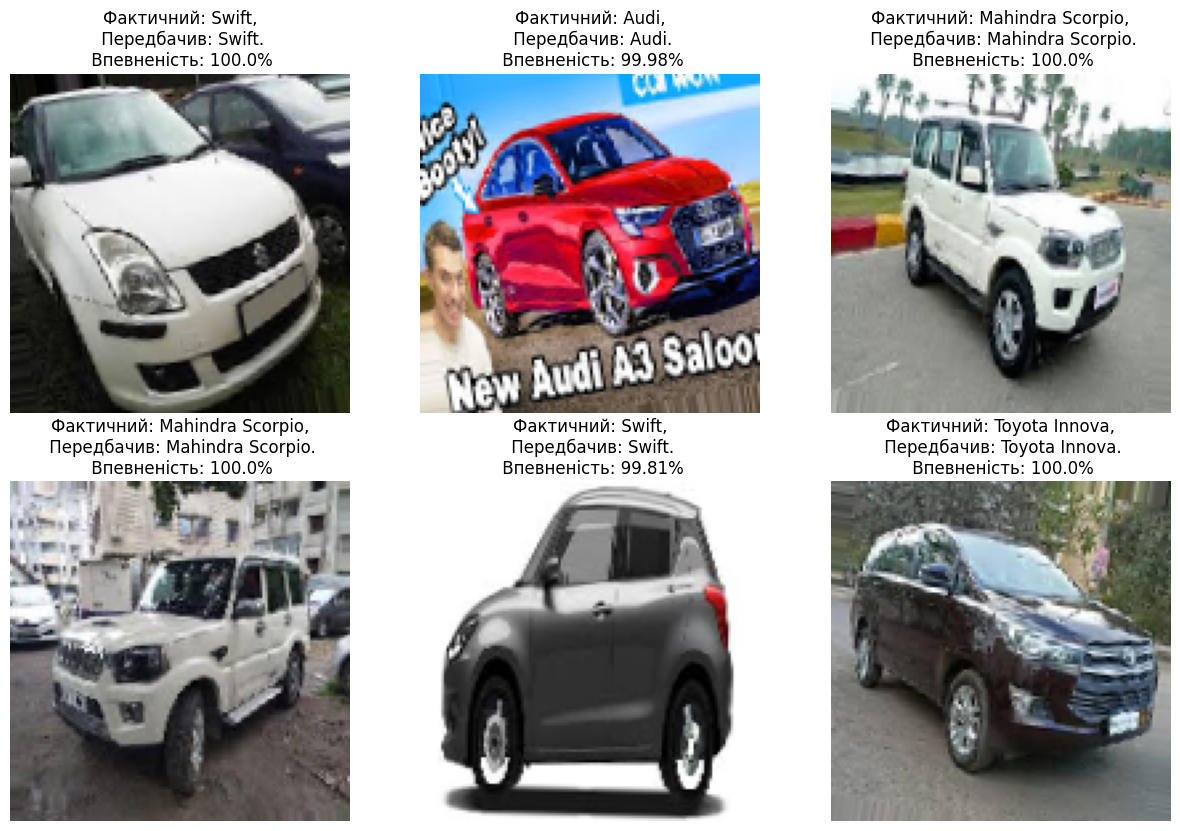

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Фактичний: {actual_class},\n Передбачив: {predicted_class}.\n Впевненість: {confidence}%")
        
        plt.axis("off")
    break

Застосування перенесення навчання (transfer learning from pre-trained weights)

In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(96, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 96)                122976    
                                                                 
 dropout_3 (Dropout)         (None, 96)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                3104      
                                                                 
 dense_11 (Dense)            (None, 7)                

In [28]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50
105/105 [==============================] - 23s 194ms/step - loss: 1.5385 - accuracy: 0.4353 - val_loss: 1.0432 - val_accuracy: 0.6261
Epoch 2/50
105/105 [==============================] - 20s 194ms/step - loss: 1.0605 - accuracy: 0.6354 - val_loss: 0.8260 - val_accuracy: 0.7306
Epoch 3/50
105/105 [==============================] - 20s 186ms/step - loss: 0.8451 - accuracy: 0.7035 - val_loss: 0.6554 - val_accuracy: 0.7774
Epoch 4/50
105/105 [==============================] - 19s 184ms/step - loss: 0.6951 - accuracy: 0.7575 - val_loss: 0.6173 - val_accuracy: 0.7823
Epoch 5/50
105/105 [==============================] - 19s 184ms/step - loss: 0.6482 - accuracy: 0.7706 - val_loss: 0.5777 - val_accuracy: 0.8093
Epoch 6/50
105/105 [==============================] - 19s 183ms/step - loss: 0.5831 - accuracy: 0.8025 - val_loss: 0.5499 - val_accuracy: 0.8069
Epoch 7/50
105/105 [==============================] - 19s 183ms/step - loss: 0.5145 - accuracy: 0.8213 - val_loss: 0.5244 - val_ac

In [29]:
base_model.trainable = True 

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

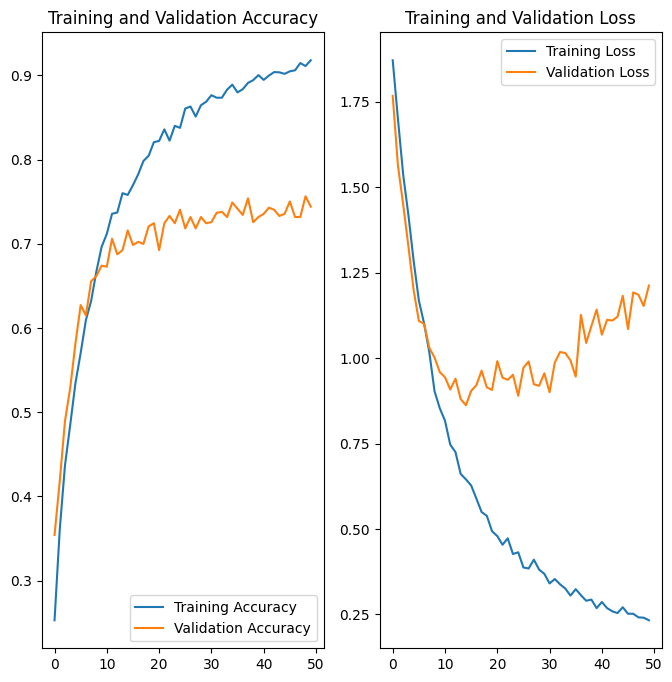

In [31]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 26ms/step


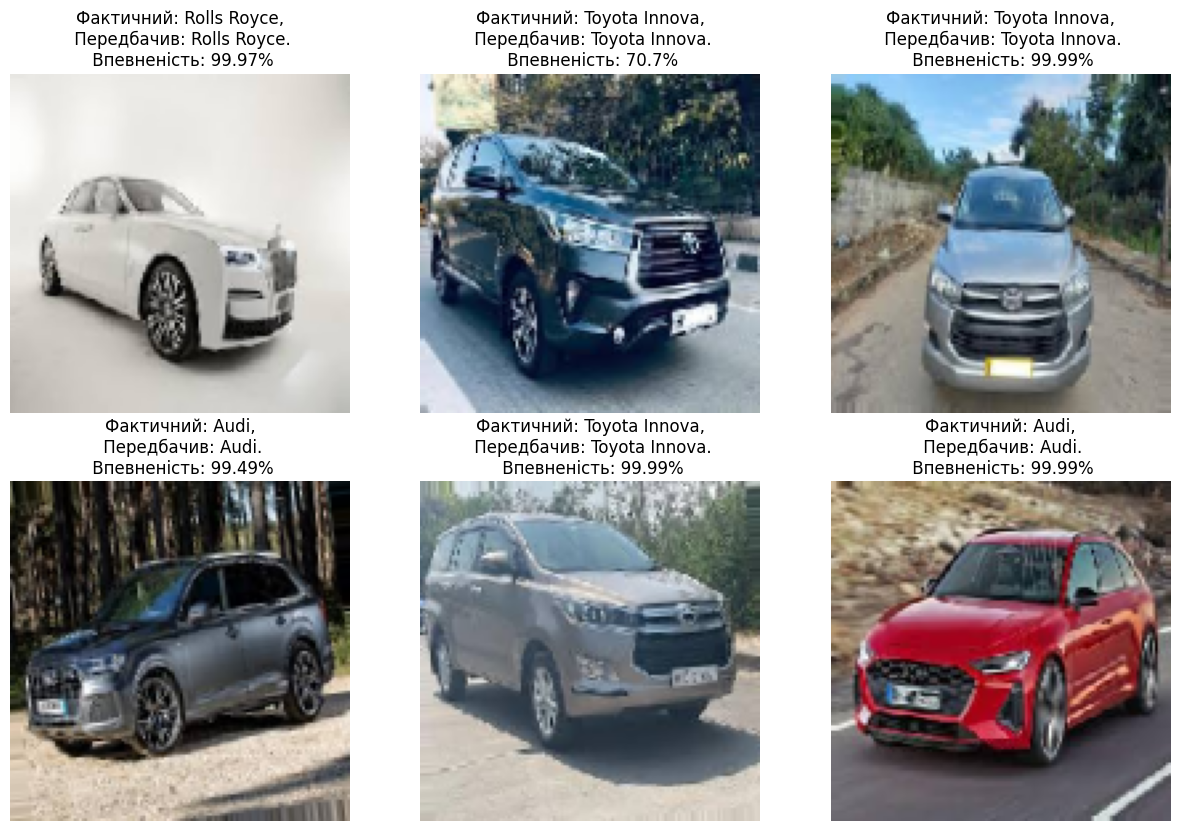

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Фактичний: {actual_class},\n Передбачив: {predicted_class}.\n Впевненість: {confidence}%")
        
        plt.axis("off")
    break

В результаті модель з перенесеним навчанням працює гірше

3. Рекурентні нейронні мережі

In [36]:
import pandas as pd

file_path = "wordset.csv"
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

   Show Number    Air Date      Round                         Category  Value  \
0         4680  2004-12-31  Jeopardy!                          HISTORY   $200   
1         4680  2004-12-31  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES   $200   
2         4680  2004-12-31  Jeopardy!      EVERYBODY TALKS ABOUT IT...   $200   
3         4680  2004-12-31  Jeopardy!                 THE COMPANY LINE   $200   
4         4680  2004-12-31  Jeopardy!              EPITAPHS & TRIBUTES   $200   

                                            Question      Answer  
0  For the last 8 years of his life, Galileo was ...  Copernicus  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  
2  The city of Yuma in this state has a record av...     Arizona  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  
4  Signer of the Dec. of Indep., framer of the Co...  John Adams  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 

In [37]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

file_path = "wordset.csv"
df = pd.read_csv(file_path)

df = df.dropna(subset=[" Question", " Answer"])

texts = df[" Question"].values
labels = df[" Category"].astype("category").cat.codes.values


Токенізація тексту і підготовка

In [38]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_sequence_length = 100
X = pad_sequences(sequences, maxlen=max_sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

num_classes = len(set(labels))
print(f"Кількість класів: {num_classes}")

Кількість класів: 27995


Налаштування моделі

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

embedding_dim = 128

model = Sequential([
    Embedding(input_dim=10000,
              output_dim=embedding_dim, 
              input_length=max_sequence_length),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 27995)             1819675   
                                                                 
Total params: 3239515 (12.36 MB)
Trainable params: 323

Навчання моделі

In [40]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
5424/5424 [==============================] - 535s 98ms/step - loss: 9.9063 - accuracy: 0.0025 - val_loss: 9.8290 - val_accuracy: 0.0027
Epoch 2/10
5424/5424 [==============================] - 522s 96ms/step - loss: 9.6371 - accuracy: 0.0039 - val_loss: 9.7775 - val_accuracy: 0.0049
Epoch 3/10
5424/5424 [==============================] - 522s 96ms/step - loss: 9.4613 - accuracy: 0.0047 - val_loss: 9.6731 - val_accuracy: 0.0050
Epoch 4/10
5424/5424 [==============================] - 522s 96ms/step - loss: 9.2954 - accuracy: 0.0062 - val_loss: 9.6053 - val_accuracy: 0.0071
Epoch 5/10
5424/5424 [==============================] - 523s 96ms/step - loss: 9.1516 - accuracy: 0.0074 - val_loss: 9.5603 - val_accuracy: 0.0086
Epoch 6/10
5424/5424 [==============================] - 521s 96ms/step - loss: 9.0170 - accuracy: 0.0085 - val_loss: 9.5283 - val_accuracy: 0.0098
Epoch 7/10
5424/5424 [==============================] - 521s 96ms/step - loss: 8.8934 - accuracy: 0.0097 - val_loss: 9

In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Точність на тестових даних: {test_accuracy:.2f}")

1356/1356 [==============================] - 36s 26ms/step - loss: 9.4881 - accuracy: 0.0124
Точність на тестових даних: 0.01


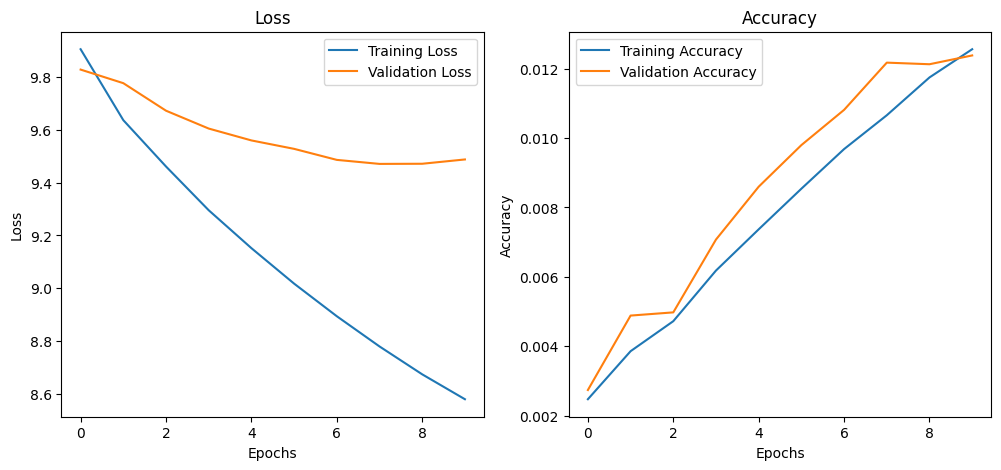

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()